#**Data Visualization and Pre-processing**

## Importing:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

## 1 & 2 Downloading and Loading the Dataset:

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3 Performing Visualizations

### 3.1 Univariate Analysis:

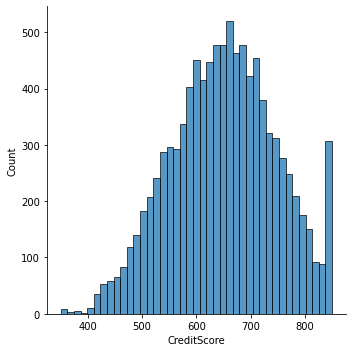

In [6]:
sns.displot(df['CreditScore'])

([<matplotlib.patches.Wedge at 0x7f2246b090d0>,
 [Text(-0.6618432068009882, 0.8786145739807555, '1'),
  Text(0.6618432068009881, -0.8786145739807556, '0')])

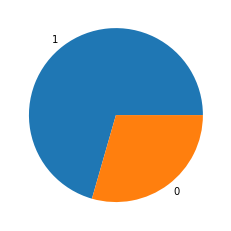

In [7]:
plt.pie(df['HasCrCard'].value_counts(),labels=df['HasCrCard'].unique())

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <a list of 10 Patch objects>)

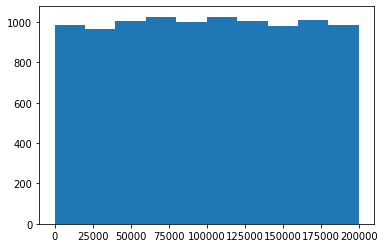

In [8]:
plt.hist(df['EstimatedSalary'])

### 3.2 Bi-Variate Analysis:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


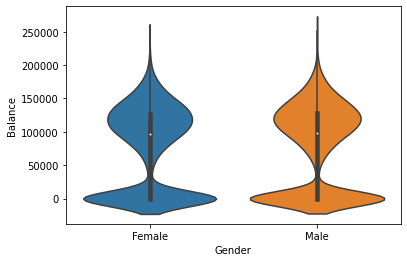

In [9]:
sns.violinplot(df['Gender'], df['Balance'])

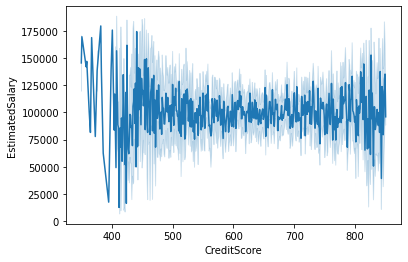

In [10]:
sns.lineplot(x=df['CreditScore'],y=df['EstimatedSalary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


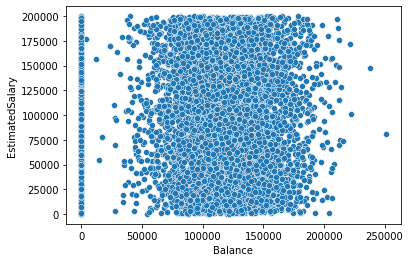

In [11]:
sns.scatterplot(df['Balance'],df['EstimatedSalary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


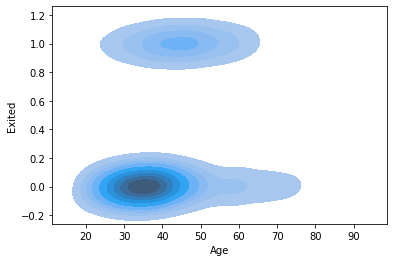

In [12]:
sns.kdeplot(df['Age'],df['Exited'],data=df,fill=True)

### 3.3 Multi-Variate Analysis:

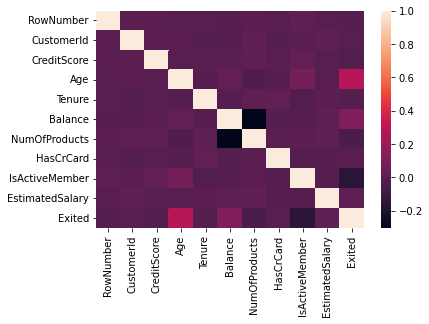

In [13]:
sns.heatmap(df.corr(),annot=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


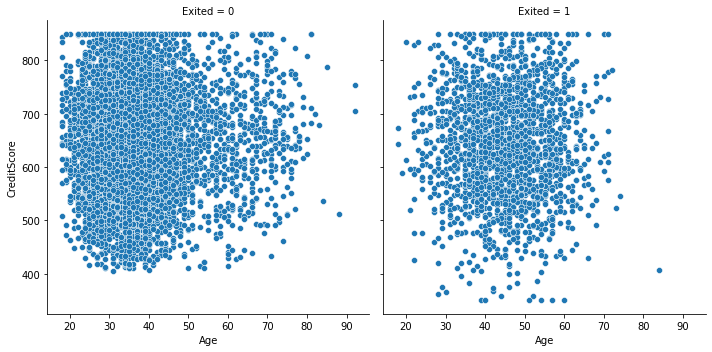

In [14]:
sns.relplot(df['Age'],df['CreditScore'],data=df,col=df['Exited'])

## 4  Performing descriptive statistics on the dataset:

In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5 Handling the Missing values:

In [16]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [17]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 6 Finding the outliers and replace the outliers:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


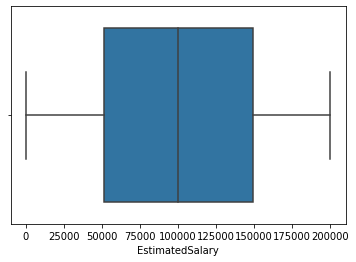

In [18]:
sns.boxplot(df['EstimatedSalary'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


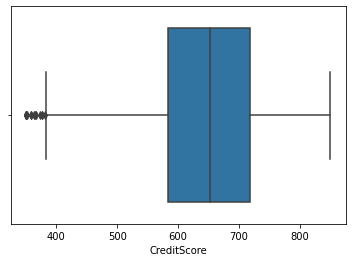

In [19]:
sns.boxplot(df['CreditScore'],data=df)

In [20]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

### Inter Quartile Range:

In [21]:
q1 = df['CreditScore'].quantile(0.25)
q3 = df['CreditScore'].quantile(0.75)
IQR = q3 - q1
width=1.5
CreditScore_outliers=df[(df['CreditScore']<q1-width*IQR)|(df['CreditScore']>q3+width*IQR)]
CreditScore_outliers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1


### Standard Deviation:

In [22]:
CreditScore_mean=df['CreditScore'].mean()
CreditScore_std=df['CreditScore'].std()
low=CreditScore_mean-(3*CreditScore_std)
high=CreditScore_mean+(3*CreditScore_std)
Credit_outliers=df[(df['CreditScore'] < low) | (df['CreditScore'] > high)]
Credit_outliers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1


### Outliers Treatment:

#### Flooring and Capping:

In [23]:
upper_limit = q3+(width*IQR)
lower_limit = q1-(width*IQR)
print(lower_limit)
print(upper_limit)

383.0
919.0


In [24]:
df['CreditScore']=np.where(df['CreditScore']>upper_limit,upper_limit,np.where(df['CreditScore']<lower_limit,lower_limit,df['CreditScore']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


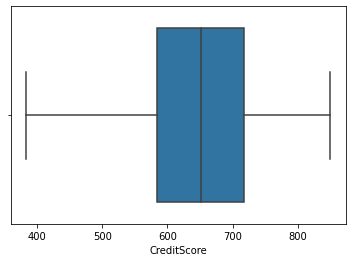

In [25]:
sns.boxplot(df['CreditScore'],data=df)

#### Trimming:

In [26]:
Q1 = df['CreditScore'].quantile(0.10)
Q3 = df['CreditScore'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df['CreditScore'][(df['CreditScore']>upper_whisker)|(df['CreditScore']<lower_whisker)].index
df.drop(index,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


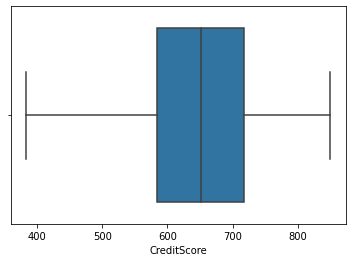

In [27]:
sns.boxplot(df['CreditScore'],data=df)

In [28]:
# Outliers can also be replaced with Mean, Median, Mode, or other values 

## 7 Checking for Categorical columns and Performing encoding:

In [29]:
print(df['Geography'].unique())

['France' 'Spain' 'Germany']


In [30]:
print(df['Tenure'].unique())

[ 2  1  8  7  4  6  3 10  5  9  0]


In [31]:
print(df['Gender'].unique())

['Female' 'Male']


In [32]:
print(df['Surname'].unique())

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']


In [33]:
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Tenure']=le.fit_transform(df['Tenure'])
df['Gender']=le.fit_transform(df['Gender'])
df['Surname']=le.fit_transform(df['Surname'])

In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619.0,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608.0,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502.0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699.0,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850.0,2,0,43,2,125510.82,1,1,1,79084.10,0


## 8 Splitting the data into dependent and independent variables:

In [35]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [36]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619.0,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608.0,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502.0,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699.0,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850.0,2,0,43,2,125510.82,1,1,1,79084.10


In [37]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## 9 Scaling the independent variables:

In [38]:
scaled_x=pd.DataFrame(scale(x),columns=x.columns)

In [39]:
scaled_x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.731878,-0.783213,-0.464183,-0.326878,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-1.731531,-0.606534,-0.390911,-0.440804,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.731185,-0.995885,0.628988,-1.538636,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,-1.730838,0.144767,-1.440356,0.501675,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,-1.730492,0.652659,0.371354,2.065569,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,0.580534,1.247373,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,1.730838,-1.682806,-0.203004,-1.393640,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,1.731185,-1.479282,0.073539,0.605244,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.731531,-0.119356,0.989439,1.257730,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


## 10 Splitting the data into training and testing:

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [43]:
# Using the scaled independent variables
xtrain1,xtest1,ytrain1,ytest1=train_test_split(scaled_x,y)